In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [28]:
def conduccion_1d(k, s, l, TA, TB, N):

    """"
    Parameters
    ---------
    l: float 
    l es la longitud del dominio. 
    
    k: float 
    k es la conductividad del material 
    
    s: float 
    s es la fuente 
    
    TA: float 
    TA es la condición de la frontera a la izquierda 
    
    TB: float 
    TB es la condición de la frontera a la derecha 
    
    N: int 
    N es el número de nodos internos (grados de libertad).
    
    Return 
    -------
    al final dibujan la solución.
    """
    
#    l = 5.0 
#    k= 0.02
#    s = 1
#    TA = 200
#    TB = 1000

#    N = 4 
    h = l / (N+1)

    T = np.zeros (N+2)
    b = np.zeros (N)
    A = np.zeros ((N,N))

    r = k/ h **2 
    b [:] = s / r
    T [0] = TA
    T [-1] = TB 
    b [0] += TA 
    b [-1] += TB 

    A[0,0] = 2 
    A[0,1] = -1 
    for i in range(1,N-1):
        A[i,i] = 2 
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1 
    A[-1,-1] = 2

    T[1:N+1] = np.linalg.solve (A,b)

    plt.plot(T)
    plt.show()

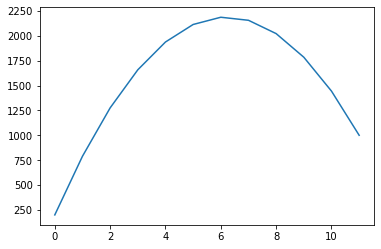

In [30]:
conduccion_1d(0.02, 10.0, 5.0, 200, 1000, 10)

In [39]:
import ipywidgets as widgets 

In [46]:
w = widgets.interactive(conduccion_1d,
                        k = widgets.fixed(0.02),
                        l = widgets.fixed(5.0),
                        s = widgets.FloatSlider(max=10.0, min=0.0, value=0, step=0.2),
                        TA = widgets.fixed(200),
                        TB = widgets.fixed(1000),
                        N = widgets.IntSlider(max=10, min=4, value=4))

In [47]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='s', max=10.0, step=0.2), IntSlider(value=4, descript…